# Analysis of Differences in Text

The plan here is to

* analyze differences among types of text
    * word choice/usage via unique vocab, freqdist, lexical diversity, most common w and w/o stopwords, plotting
    * context via concordance, collocations, similar, common_contexts
* from these concepts, build a corpus of docs and explore differences in scholarly lit across disciplines
    * requires above plus pre-processing, tokenizing, etc.
    
### Running outline

1. Import gutenberg corpus - overview of other avaialble corpora and why might use them (lots of preprocessing!)
2. Corpus methods - sents, paras, etc.
3. Init a gutenberg text as Text
4. text module methods
5. do comparison of texts per above

In [37]:
import nltk
import numpy as np
import matplotlib

In [38]:
# NLTK data need to be downloaded separately. Uncomment and run the next line the first time this notebook is run
# on a new system.

# nltk.download() # use id 'all' to download all

In [73]:
from nltk.tokenize.stanford import StanfordTokenizer
from nltk import word_tokenize
from nltk.corpus import gutenberg, stopwords
from nltk import draw
from nltk.probability import *

Using examples from https://www.nltk.org/book/

```
Bird, Steven, Ewan Klein, and Edward Loper (2015). _Natural Language Processing with Python_. Accessed 2018-10-16 from https://www.nltk.org/book/.
```

In [40]:
# These are the texts in Gutenberg

print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [41]:
# some corpus methods
# https://www.nltk.org/api/nltk.corpus.reader
# gb is plaintext, so the available methods are defined at
# https://www.nltk.org/api/nltk.corpus.reader.html#module-nltk.corpus.reader.plaintext

gutenberg.sents('melville-moby_dick.txt') # a list of lists - do raw, then words first

[['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']'], ['ETYMOLOGY', '.'], ...]

In [42]:
# with plaintext, options are words, sents, paras, raw

gutenberg.words('melville-moby_dick.txt') # list of words and punctuation

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]

In [43]:
gutenberg.paras('melville-moby_dick.txt') # lists of lists of lists

[[['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']']], [['ETYMOLOGY', '.']], ...]

In [44]:
# gutenberg.raw('melville-moby_dick.txt')

In [45]:
# more info on corpuse package at https://www.nltk.org/api/nltk.corpus.html
# Text module provides some analysis methods - need to make doc text and instance of nltk.Text

moby = nltk.Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))

In [46]:
# OR
# so creating as instance of Text object gives us access to different methods, in our case to explore context
# see text Module at https://www.nltk.org/api/nltk.html

from nltk.text import Text

moby = Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))
moby.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


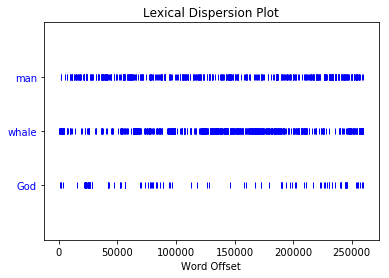

In [47]:
moby.dispersion_plot(['man', 'whale', 'God'])

In [48]:
moby.concordance('chowder')

Displaying 9 of 9 matches:
of walruses and whales . CHAPTER 15 Chowder . It was quite late in the evening 
t before us . But when that smoking chowder came in , the mystery was delightfu
e fishing food before him , and the chowder being surpassingly excellent , we d
vor , and in good time a fine cod - chowder was placed before us . We resumed b
t ' s that stultifying saying about chowder - headed people ? " But look , Quee
here were always boiling chowders . Chowder for breakfast , and chowder for din
wders . Chowder for breakfast , and chowder for dinner , and chowder for supper
fast , and chowder for dinner , and chowder for supper , till you began to look
p it for you till morning . But the chowder ; clam or cod to - morrow for break


In [49]:
moby.common_contexts(['man', 'whale'])

a_, old_, a_. white_-- the_' a_like one_, the_that the_- the_now
no_can a_in the_, the_in the_to a_' a_to a_that the_. a_as


In [50]:
from nltk.text import *

In [51]:
ci = ContextIndex(moby)

In [52]:
ci.common_contexts(['man', 'whale', 'God'])

FreqDist({(',', '!'): 3,
          (',', ','): 3,
          ('great', ','): 3,
          ('o', '!'): 3,
          ('of', "'"): 3,
          ('the', '-'): 3,
          ('the', 'of'): 3})

In [53]:
ci.similar_words('man')

['then',
 'sir',
 'too',
 'whale',
 'which',
 'ship',
 'who',
 'now',
 'indeed',
 'sea',
 'Queequeg',
 'and',
 'perhaps',
 'Ahab',
 'sort',
 'boat',
 'gentlemen',
 'men',
 'Mr',
 'aye']

In [54]:
ci.word_similarity_dict('whale')

{'[': 0,
 'Moby': 0.003780718336483932,
 'Dick': 0.003816793893129771,
 'by': 0.005653710247349823,
 'Herman': 0,
 'Melville': 0,
 '1851': 0,
 ']': 0,
 'ETYMOLOGY': 0,
 '.': 0.0006075334143377885,
 '(': 0,
 'Supplied': 0,
 'a': 0.0009017132551848512,
 'Late': 0,
 'Consumptive': 0,
 'Usher': 0,
 'to': 0.002846975088967971,
 'Grammar': 0,
 'School': 0,
 ')': 0,
 'The': 0,
 'pale': 0.007905138339920948,
 '--': 0.001304631441617743,
 'threadbare': 0,
 'in': 0.0011357183418512207,
 'coat': 0.019417475728155338,
 ',': 0.0010224948875255625,
 'heart': 0.05,
 'body': 0.06944444444444443,
 'and': 0.00099626400996264,
 'brain': 0.03461538461538462,
 ';': 0.000980392156862745,
 'I': 0.005672149744753261,
 'see': 0.002976190476190476,
 'him': 0.003249390739236393,
 'now': 0.009652509652509652,
 'He': 0,
 'was': 0.00580046403712297,
 'ever': 0.009077155824508321,
 'dusting': 0,
 'his': 0.0015594541910331384,
 'old': 0.004790419161676647,
 'lexicons': 0,
 'grammars': 0.004081632653061225,
 'with': 0

In [55]:
cci = ConcordanceIndex(moby)

In [56]:
cci.offsets('whale')

[108,
 362,
 1063,
 1135,
 1180,
 1207,
 1240,
 1291,
 1492,
 1645,
 1820,
 1848,
 1867,
 1895,
 1940,
 2006,
 2129,
 2196,
 2238,
 2301,
 2324,
 2508,
 2563,
 2672,
 2738,
 2779,
 2792,
 2990,
 3106,
 3138,
 3265,
 3349,
 3379,
 3398,
 3667,
 3742,
 3891,
 4032,
 4175,
 4209,
 4244,
 4663,
 7080,
 7114,
 7283,
 7527,
 9490,
 9682,
 9878,
 9897,
 10831,
 13445,
 19211,
 19353,
 22336,
 22427,
 24061,
 24554,
 25184,
 25329,
 25751,
 25829,
 25872,
 31044,
 31645,
 31842,
 35526,
 35752,
 36561,
 36567,
 36655,
 36817,
 37423,
 40335,
 41035,
 44897,
 44936,
 44989,
 45051,
 45059,
 46532,
 50101,
 51931,
 52881,
 52912,
 52985,
 53026,
 53410,
 53478,
 53657,
 53805,
 53812,
 53850,
 53878,
 53924,
 53991,
 54074,
 54222,
 54239,
 54284,
 54535,
 55395,
 55501,
 56435,
 56489,
 57046,
 57961,
 57984,
 59361,
 61753,
 62963,
 63104,
 63223,
 63279,
 63361,
 63473,
 63513,
 63533,
 63540,
 63555,
 63611,
 63630,
 63663,
 63704,
 63711,
 63731,
 63771,
 63788,
 63826,
 64163,
 64358,
 643

In [57]:
cci.print_concordance('whale')

Displaying 25 of 906 matches:
, and to teach them by what name a whale - fish is to be called in our tong
ast , take the higgledy - piggledy whale statements , however authentic , i
readful gulf of this monster ' s ( whale ' s ) mouth , are immediately lost
atient Job ." -- RABELAIS . " This whale ' s liver was two cartloads ." -- 
ouching that monstrous bulk of the whale or ork we have received nothing ce
f oil will be extracted out of one whale ." -- IBID . " HISTORY OF LIFE AND
e ." -- KING HENRY . " Very like a whale ." -- HAMLET . " Which to secure ,
stless paine , Like as the wounded whale to shore flies thro ' the maine ."
had been a sprat in the mouth of a whale ." -- PILGRIM ' S PROGRESS . " Tha
 ' S ANNUS MIRABILIS . " While the whale is floating at the stern of the sh
n - the - Whale . ... Some say the whale can ' t open his mouth , but that 
asts to see whether they can see a whale , for the first discoverer has a d
or his pains . ... I was told of a whale taken near Shetla

In [58]:
moby.count('whale')

906

In [59]:
# Vocab is a freqdist - some shortcuts (so do a fd on plaintext above)

moby.vocab().most_common()

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624),
 ('The', 612),
 ('their', 612),
 ('are', 586),
 ('they', 586),
 ('an', 582),
 ('some', 578),
 ('then', 571),
 ('my', 564),
 ('when', 553),
 ('upon', 538),
 ('out', 529),
 ('into', 520),
 ('man', 508),
 ('ship', 507),
 ('up', 505),
 ('mor

In [60]:
len(moby.vocab())

19317

In [61]:
len(moby)

260819

In [62]:
len(set(moby)) # so vocab is uniques

19317

In [63]:
# maybe a roundabout way to remove stopwords for the FD

from nltk.corpus import stopwords

In [64]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish', 'turkish']


In [65]:
esw = stopwords.words('english')

In [66]:
esw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [67]:
# Text object doesn't provide a list of word, so we need either the tokens from one of the indexes 
# or we can go back to the source file

# we need to lowercase everything, too

nsw = [w.lower() for w in ci.tokens() if w.lower() not in esw and w.isalpha()]

In [68]:
len(gutenberg.words('melville-moby_dick.txt'))

260819

In [69]:
len(nsw)

110459

In [74]:
fd1 = FreqDist(gutenberg.words('melville-moby_dick.txt'))

In [75]:
fd2 = FreqDist(nsw)

In [76]:
fd1.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

In [77]:
fd2.most_common(20)

[('whale', 1226),
 ('one', 921),
 ('like', 647),
 ('upon', 566),
 ('man', 527),
 ('ship', 518),
 ('ahab', 511),
 ('ye', 472),
 ('sea', 455),
 ('old', 450),
 ('would', 432),
 ('though', 384),
 ('head', 345),
 ('yet', 345),
 ('boat', 336),
 ('time', 334),
 ('long', 333),
 ('captain', 329),
 ('still', 312),
 ('great', 306)]

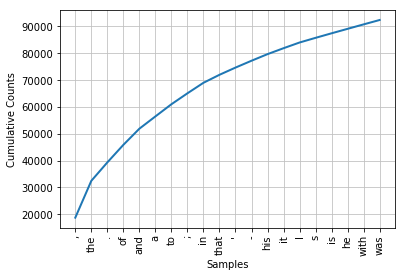

In [78]:
fd1.plot(20, cumulative = True)

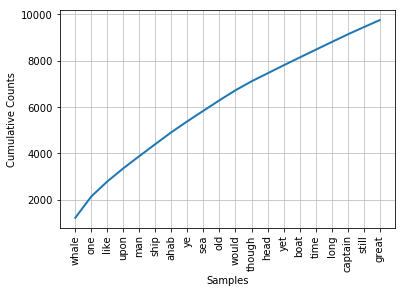

In [79]:
fd2.plot(20, cumulative = True)

In [82]:
# So what can we do with this?

# Hard to compare texts in the provided PG corpus - different genres, time periods, etc.

# Use requests to access ED and WW complete-ish from PG onine

import requests

In [199]:
r = requests.get('https://www.gutenberg.org/files/12242/12242.txt')
emily = r.text
with open('poetry/emily_dickinson_raw.txt', 'w', encoding='latin-1') as e:
    e.write(emily)
    e.close()

In [200]:
r = requests.get('https://www.gutenberg.org/files/8388/8388-8.txt')
walt = r.text
with open('poetry/walt_whitman_raw.txt', 'w', encoding='latin-1') as w:
    w.write(walt)
    w.close()

In [201]:
len(emily)

208189

In [202]:
len(walt)

419455

In [203]:
# these raw texts are not very nice - right now each one is one long string

emily

'Project Gutenberg\'s Poems: Three Series, Complete, by Emily Dickinson\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.net\r\n\r\n\r\nTitle: Poems: Three Series, Complete\r\n\r\nAuthor: Emily Dickinson\r\n\r\nRelease Date: May 3, 2004 [EBook #12242]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: ASCII\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK POEMS: THREE SERIES, COMPLETE ***\r\n\r\n\r\n\r\n\r\nProduced by Jim Tinsley <jtinsley@pobox.com>\r\n\r\n\r\n\r\n\r\n\r\nPOEMS\r\n\r\nby EMILY DICKINSON\r\n\r\n\r\n\r\n\r\nEdited by two of her friends\r\n\r\nMABEL LOOMIS TODD and T.W. HIGGINSON\r\n\r\n\r\n\r\n\r\nPREFACE.\r\n\r\nThe verses of Emily Dickinson belong emphatically to what Emerson\r\nlong since called "the Poetry of the Portfolio,"--something produced\r\nabso

In [204]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [205]:
am_poets = PlaintextCorpusReader('poetry/', '.*') # note we are not including the raw files

In [206]:
# we now have a corpus and can use the plaintext corpus methods above

am_poets.fileids()

['emily_dickinson_edit.txt',
 'emily_dickinson_raw.txt',
 'w3.txt',
 'walt_whitman_edit.txt',
 'walt_whitman_edits.txt',
 'walt_whitman_raw.txt']

In [207]:
walt = am_poets.words('walt_whitman_raw.txt')

In [208]:
emily = am_poets.words('emily_dickinson_raw.txt')

In [209]:
len(am_poets.raw('emily_dickinson_raw.txt'))

218928

In [210]:
len(am_poets.words('emily_dickinson_raw.txt'))

42428

In [211]:
len(am_poets.sents('emily_dickinson_raw.txt'))

6991

In [212]:
len(am_poets.paras('emily_dickinson_raw.txt')) # note how close this is to sents

6768

In [198]:
len(am_poets.raw('w3.txt'))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 9674: invalid continuation byte

In [187]:
len(am_poets.words('walt_whitman_edits.txt'))

63969

In [188]:
len(am_poets.sents('walt_whitman_edits.txt'))

AssertionError: 